<a href="https://colab.research.google.com/github/LuixCabral/Machine-Learning/blob/main/Rede_Bayes_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

In [ ]:
!pip install pgmpy

In [ ]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


import networkx as nx

from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, BicScore,K2Score, BayesianEstimator,MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination


In [ ]:
data = fetch_ucirepo(id=2)

print(data.variables)


              name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                       

In [ ]:
uci_data = fetch_ucirepo(id=2)

cleaning_features = pd.DataFrame(uci_data.data.features)

cleaning_features.dropna(inplace=True)
cleared_data_features =cleaning_features.drop(columns='fnlwgt')

missing_values = cleared_data_features.isnull().sum()
print("Valores ausentes após a limpeza:")
print(missing_values)


cleaning_target = pd.DataFrame(uci_data.data.targets)

cleaning_target.dropna(inplace=True)

missing_values = cleaning_target.isnull().sum()
print("Valores ausentes após a limpeza:")
print(missing_values)


df = pd.concat([cleared_data_features, cleaning_target], axis=1)

df['income'] = df['income'].str.replace('<=50K.?', '<=50K', regex=True)
df['income'] = df['income'].str.replace('>50K.?', '>50K', regex=True)
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})
print(df['income'].unique())

Valores ausentes após a limpeza:
age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64
Valores ausentes após a limpeza:
income    0
dtype: int64
[0 1]


In [ ]:
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])


print(df['age'].unique())
print(df['income'].unique())
print(df['workclass'].unique())
print(df['education'].unique())
print(df['marital-status'].unique())
print(df['occupation'].unique())
print(df['relationship'].unique())
print(df['race'].unique())
print(df['sex'].unique())
print(df['native-country'].unique())

[39. 50. 38. 53. 28. 37. 49. 52. 31. 42. 30. 23. 32. 40. 34. 25. 43. 54.
 35. 59. 56. 19. 20. 45. 22. 48. 21. 24. 57. 44. 41. 29. 18. 47. 46. 36.
 79. 27. 67. 33. 76. 17. 55. 61. 70. 64. 71. 68. 66. 51. 58. 26. 60. 90.
 75. 65. 77. 62. 63. 80. 72. 74. 69. 73. 81. 78. 88. 82. 83. 84. 85. 86.
 87. 89. nan]
[0 1]
[7 6 4 1 2 0 5 8 3 9]
[ 9 11  1 12  6 15  7  8  5 10 14  4  0  3 13  2 16]
[4 2 0 3 5 1 6 7]
[ 1  4  6 10  8 12  3 14  5  7 13  0 11  2  9 15]
[1 0 5 3 4 2 6]
[4 2 1 0 3 5]
[1 0 2]
[39  5 23 19  0 26 35 33 16  9  2 11 20 30 22 31  4  1 37  7 25 36 14 32
  6  8 10 13  3 24 41 29 28 34 38 12 27 40 17 21 18 15 42]


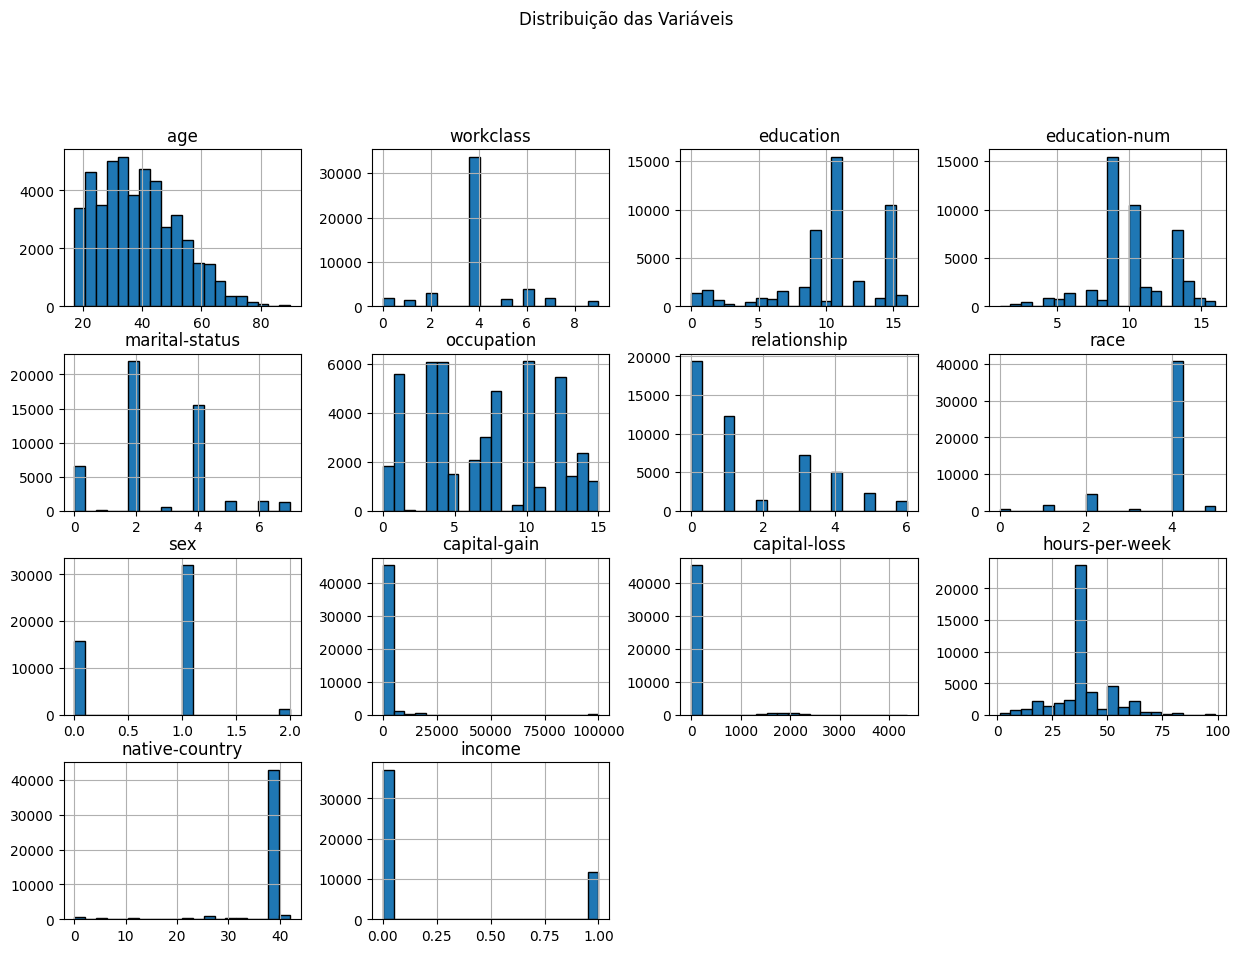

In [ ]:
df.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Distribuição das Variáveis', y=1.02)
plt.show()

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('age', 'relationship'), ('education-num', 'education'), ('education-num', 'occupation'), ('education-num', 'income'), ('occupation', 'workclass'), ('relationship', 'marital-status'), ('relationship', 'sex'), ('relationship', 'income'), ('relationship', 'education-num'), ('sex', 'native-country'), ('sex', 'occupation'), ('native-country', 'race'), ('income', 'capital-gain'), ('income', 'hours-per-week'), ('income', 'capital-loss')]


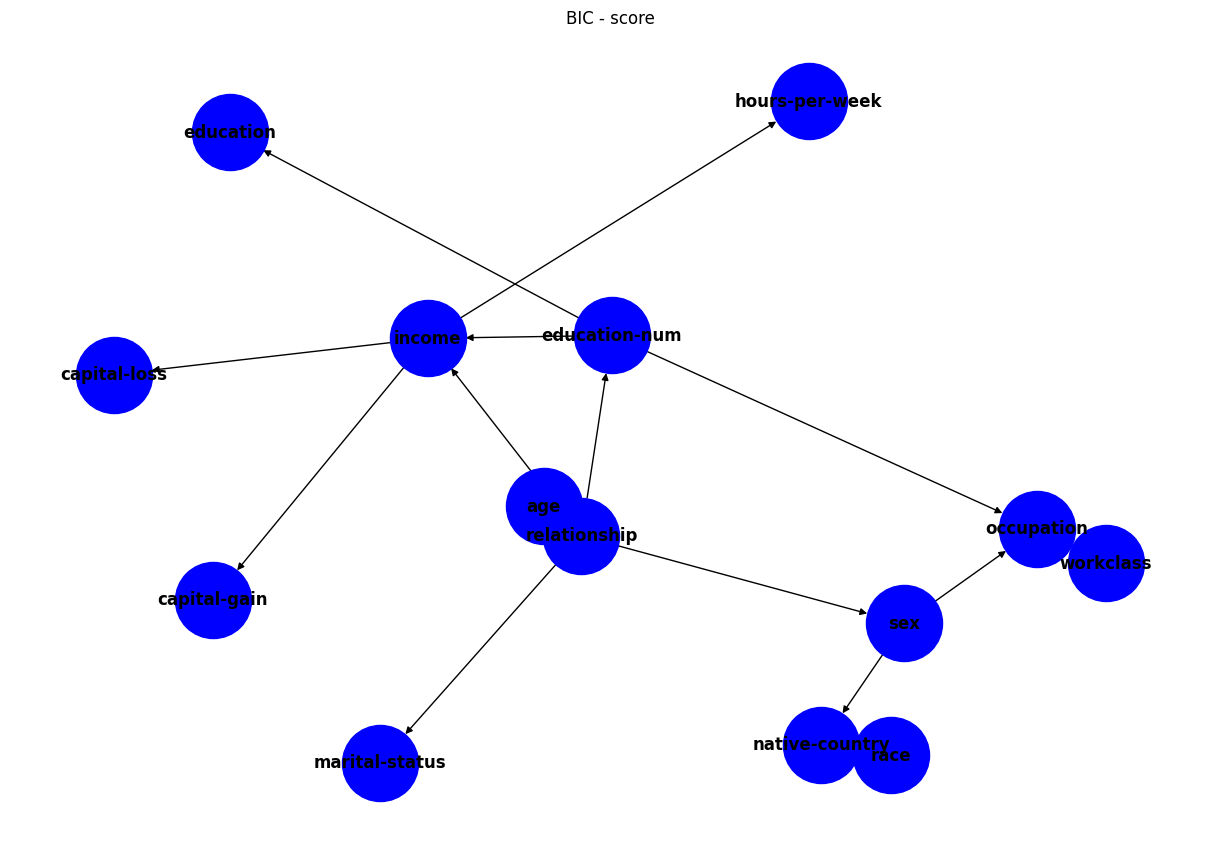

In [ ]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

est = HillClimbSearch(train_data)
bic_model = est.estimate(scoring_method=BicScore(train_data))

model = BayesianNetwork(bic_model.edges())
model.fit(train_data, estimator=MaximumLikelihoodEstimator)

print(bic_model.edges())

plt.figure(figsize=(12, 8))
G = nx.DiGraph()
G.add_edges_from(bic_model.edges())
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="blue", font_size=12, font_weight="bold", arrows=True)
plt.title("BIC - score")
plt.show()

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('age', 'hours-per-week'), ('workclass', 'education'), ('workclass', 'occupation'), ('workclass', 'native-country'), ('workclass', 'education-num'), ('workclass', 'age'), ('workclass', 'hours-per-week'), ('education', 'native-country'), ('education', 'age'), ('education', 'hours-per-week'), ('education-num', 'education'), ('education-num', 'native-country'), ('education-num', 'age'), ('education-num', 'hours-per-week'), ('marital-status', 'education'), ('marital-status', 'occupation'), ('marital-status', 'workclass'), ('marital-status', 'native-country'), ('marital-status', 'education-num'), ('marital-status', 'age'), ('marital-status', 'hours-per-week'), ('occupation', 'education'), ('occupation', 'native-country'), ('occupation', 'age'), ('occupation', 'education-num'), ('occupation', 'hours-per-week'), ('relationship', 'education'), ('relationship', 'occupation'), ('relationship', 'marital-status'), ('relationship', 'workclass'), ('relationship', 'native-country'), ('relationship',

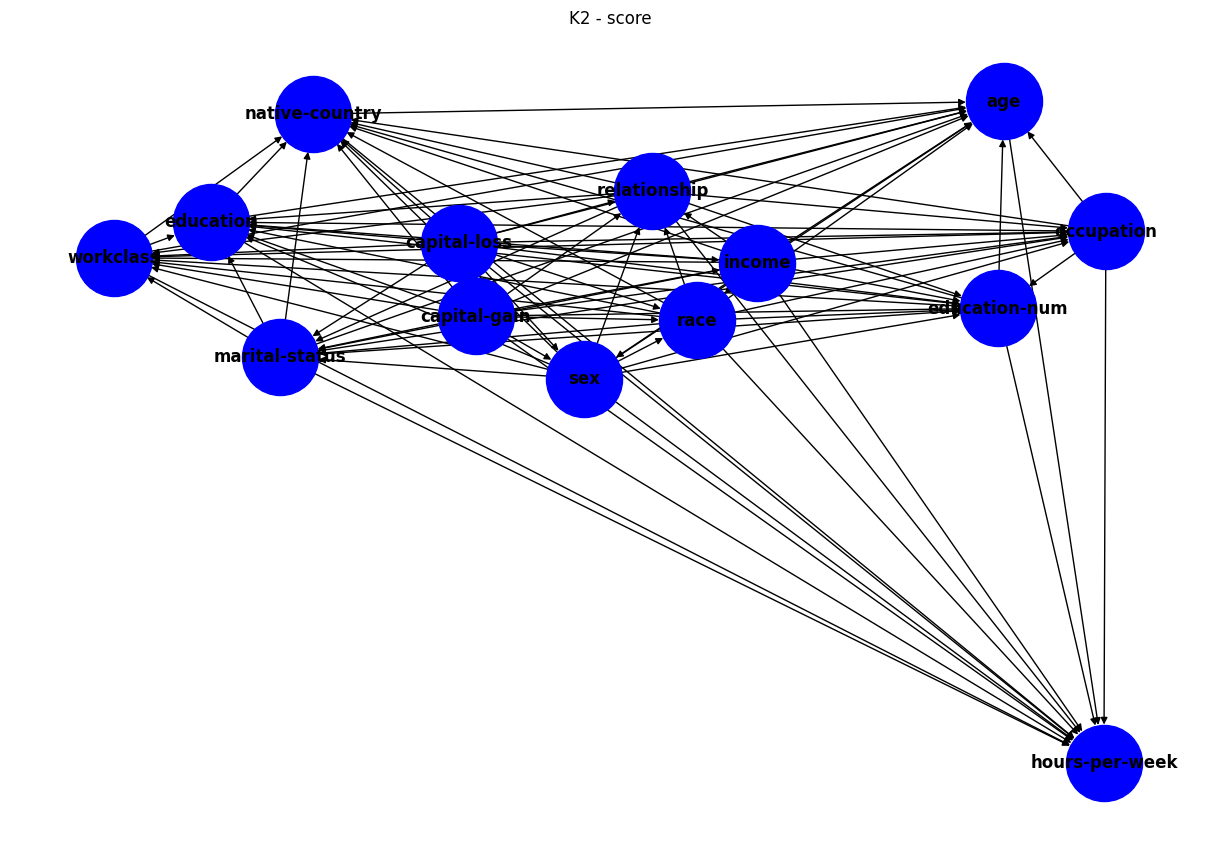

In [ ]:
est = HillClimbSearch(train_data)
k2_model = est.estimate(scoring_method=K2Score(train_data))

model = BayesianNetwork(bic_model.edges())
model.fit(train_data, estimator=MaximumLikelihoodEstimator)

print(k2_model.edges())

plt.figure(figsize=(12, 8))
G = nx.DiGraph()
G.add_edges_from(k2_model.edges())
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="blue", font_size=12, font_weight="bold", arrows=True)
plt.title("K2 - score")
plt.show()

In [ ]:
print(train_data.nunique())
print(test_data.nunique())


age                74
workclass          10
education          17
education-num      16
marital-status      8
occupation         16
relationship        7
race                6
sex                 3
capital-gain      120
capital-loss       97
hours-per-week     96
native-country     42
income              2
dtype: int64
age               69
workclass          9
education         17
education-num     16
marital-status     8
occupation        16
relationship       7
race               6
sex                3
capital-gain      92
capital-loss      67
hours-per-week    85
native-country    43
income             2
dtype: int64


In [ ]:
import time
import logging
from pgmpy.inference import VariableElimination, ApproxInference


logging.getLogger("pgmpy").setLevel(logging.ERROR)

exata_inference = VariableElimination(model)
aproximada_inference = ApproxInference(model)


evidence = {'age': 30, 'education': 9, 'occupation': 4}

start_time_exata = time.time()
result_exata = exata_inference.query(variables=['income'], evidence=evidence)
end_time_exata = time.time()
tempo_exata = end_time_exata - start_time_exata

print("Inferência Exata")
print(result_exata)
print(f"Tempo de execução da inferência exata: {tempo_exata:.4f} segundos\n")

start_time_aproximada = time.time()
result_aproximada = aproximada_inference.query(variables=['income'], evidence=evidence)
end_time_aproximada = time.time()
tempo_aproximada = end_time_aproximada - start_time_aproximada

print("Inferência Aproximada")
print(result_aproximada)
print(f"Tempo de execução da inferência aproximada: {tempo_aproximada:.4f} segundos\n")

print("Comparação dos Resultados:")
print("Inferência Exata:", result_exata)
print("Inferência Aproximada:", result_aproximada)
print(f"Tempo de Inferência Exata: {tempo_exata:.4f} segundos")
print(f"Tempo de Inferência Aproximada: {tempo_aproximada:.4f} segundos")


Inferência Exata
+-----------+---------------+
| income    |   phi(income) |
+===========+===============+
| income(0) |        0.5889 |
+-----------+---------------+
| income(1) |        0.4111 |
+-----------+---------------+
Tempo de execução da inferência exata: 0.0054 segundos



  0%|          | 0/10000 [00:00<?, ?it/s]

Inferência Aproximada
+-----------+---------------+
| income    |   phi(income) |
+===========+===============+
| income(0) |        0.5595 |
+-----------+---------------+
| income(1) |        0.4405 |
+-----------+---------------+
Tempo de execução da inferência aproximada: 435.9839 segundos

Comparação dos Resultados:
Inferência Exata: +-----------+---------------+
| income    |   phi(income) |
+===========+===============+
| income(0) |        0.5889 |
+-----------+---------------+
| income(1) |        0.4111 |
+-----------+---------------+
Inferência Aproximada: +-----------+---------------+
| income    |   phi(income) |
+===========+===============+
| income(0) |        0.5595 |
+-----------+---------------+
| income(1) |        0.4405 |
+-----------+---------------+
Tempo de Inferência Exata: 0.0054 segundos
Tempo de Inferência Aproximada: 435.9839 segundos


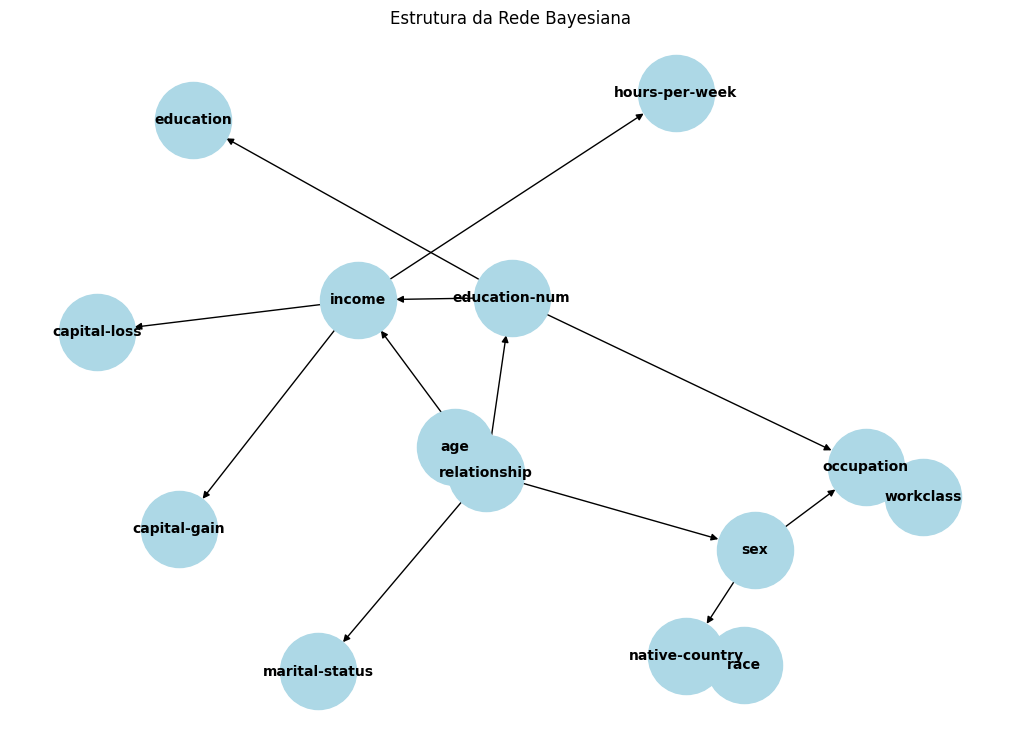

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Cria o gráfico da estrutura da rede
G = nx.DiGraph()
G.add_edges_from(bic_model.edges())  # bic_model.edges() deve conter as conexões da sua rede
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrows=True)
plt.title("Estrutura da Rede Bayesiana")
plt.show()


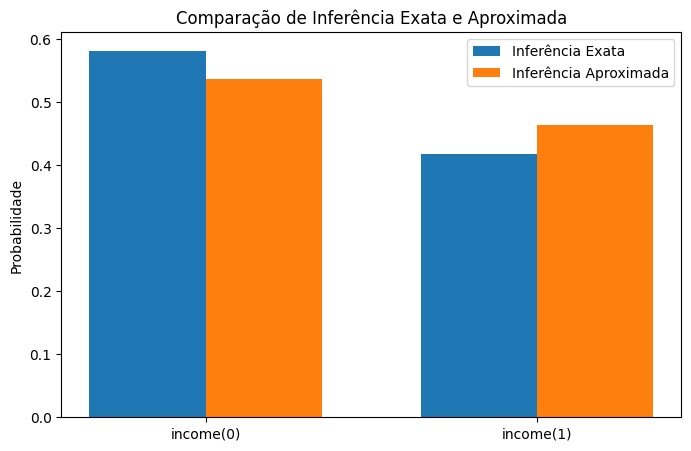

In [ ]:
import matplotlib.pyplot as plt

# Dados de exemplo para os valores de inferência exata e aproximada
exata = [0.5818, 0.4182]
aproximada = [0.5369, 0.4631]
labels = ['income(0)', 'income(1)']

# Criação do gráfico de barras
x = range(len(labels))
width = 0.35  # Largura das barras

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x, exata, width, label='Inferência Exata')
ax.bar([i + width for i in x], aproximada, width, label='Inferência Aproximada')

ax.set_ylabel('Probabilidade')
ax.set_title('Comparação de Inferência Exata e Aproximada')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

plt.show()
